# 数据分组

```{admonition} 在线刷题
:class: seealso

检查 or 强化 `Pandas` 数据分析操作？<a href="https://www.heywhale.com/mw/project/6146c0318447b8001769ff20" target="_blank">👉在线体验「Pandas进阶修炼300题」</a>
```

```{note} 
本页面代码可以[在线编辑、执行](../指引/在线执行.md)！
```

数据分组是 `pandas` 数据分析的核心功能，可以将一个 `DataFrame` 根据一定的规则拆分为多个组合，并应用不同的函数进行计算，`pd.groupby`接收多个参数（`DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=NoDefault.no_default, observed=False, dropna=True)`），但整体思想如下图简单的过程所示，即**分组 + 计算** 输出不同地区员工的平均薪资


```{figure} https://pic.liuzaoqi.com/picgo/202112231751376.png
:width: 100%
:align: center
```

当然上面的过程还有其他的实现方法，例如写成 `df.groupby("地区", as_index=False)['薪资'].mean()`，如果你想进一步了解，下面是更多数据分组的案例，你可以修改相关代码来验证自己的想法！

## 本页数据说明

为了更好的介绍相关操作，本页面使用 **某招聘网站数据.csv** 数据进行展开，你应该对数据**字段、数值、类型**等相关信息做一个大致了解！

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth',8)
df = pd.read_csv("某招聘网站数据.csv",parse_dates=['createTime'])
df.head()

,positionName,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,createTime,district,salary,workYear,jobNature,education,positionAdvantage,imState,score,matchScore,famousCompany
0,数据分析,50-150人,移动互联...,A轮,['绩效...,产品|需...,数据分析,数据分析,2020-...,余杭区,37500,1-3年,全职,本科,五险一金...,today,233,15.1...,False
1,数据建模,150-...,电商,B轮,['年终...,开发|测...,数据开发,建模,2020-...,滨江区,15000,3-5年,全职,本科,六险一金...,disa...,176,32.5...,False
2,数据分析,2000人以上,移动互联...,上市公司,['节日...,产品|需...,数据分析,数据分析,2020-...,江干区,3500,1-3年,全职,本科,五险一金...,today,80,14.9...,False
3,数据分析,500-...,电商,D轮及以上,['生日...,开发|测...,数据开发,数据分析,2020-...,江干区,45000,3-5年,全职,本科,年终奖等,thre...,68,12.8...,True
4,数据分析,2000人以上,物流丨运输,上市公司,['技能...,产品|需...,数据分析,数据分析,2020-...,余杭区,30000,3-5年,全职,大专,五险一金,disa...,66,12.7...,True


## 分组统计

### 均值

计算各区(`district`)的薪资(`salary`)均值

In [2]:
df[['district','salary']].groupby(by='district').mean()

# df.groupby("district")['salary'].mean()

,salary
district,
上城区,2625...
下沙,3000...
余杭区,3358...
拱墅区,2850...
江干区,2525...
滨江区,3142...
萧山区,3625...
西湖区,3089...


### 取消索引

重新按照上一题要求进行分组，但不使用 `district` 做为索引

In [3]:
df.groupby("district", as_index=False)['salary'].mean()

,district,salary
0,上城区,2625...
1,下沙,3000...
2,余杭区,3358...
3,拱墅区,2850...
4,江干区,2525...
5,滨江区,3142...
6,萧山区,3625...
7,西湖区,3089...


### 排序

计算并提取平均薪资最高的区

In [4]:
df[['district','salary']].groupby(by='district').mean().sort_values('salary',ascending=False).head(1)

,salary
district,
萧山区,36250.0


### 频率

计算不同行政区(`district`)，不同规模公司(`companySize`)出现的次数

In [5]:
pd.DataFrame(df.groupby("district")['companySize'].value_counts())

# df.groupby(['district','companySize']).size()

companySize
district compa...             
上城区      50-150人         2    
下沙       150-500人        1    
余杭区      2000人以上        14    
         150-500人       13    
         50-150人         7    
         500-2...        2    
拱墅区      500-2...        2    
         2000人以上         1    
         50-150人         1    
江干区      2000人以上         2    
         500-2...        2    
滨江区      150-500人       14    
         2000人以上         6    
         500-2...        1    
萧山区      500-2...        3    
         50-150人         1    
西湖区      2000人以上        11    
         500-2...        9    
         150-500人        7    
         50-150人         5    
         15-50人          1

### 修改索引名

将上一题的索引名修改为
- district -> 行政区
- companySize -> 公司规模

In [6]:
pd.DataFrame(df.groupby("district")['companySize'].value_counts()).rename_axis(["行政区", "公司规模"])

companySize
行政区 公司规模                 
上城区 50-150人         2    
下沙  150-500人        1    
余杭区 2000人以上        14    
    150-500人       13    
    50-150人         7    
    500-2...        2    
拱墅区 500-2...        2    
    2000人以上         1    
    50-150人         1    
江干区 2000人以上         2    
    500-2...        2    
滨江区 150-500人       14    
    2000人以上         6    
    500-2...        1    
萧山区 500-2...        3    
    50-150人         1    
西湖区 2000人以上        11    
    500-2...        9    
    150-500人        7    
    50-150人         5    
    15-50人          1

### 计数

在上一个操作的基础上，统计每个区出现的公司数量

In [7]:
df.groupby("district")['companySize'].count()

district
上城区     2
下沙      1
余杭区    36
拱墅区     4
江干区     4
滨江区    21
萧山区     4
西湖区    33
Name: companySize, dtype: int64

## 分组查看

### 查看各组信息

将数据按照 `district`、`salary` 进行分组，并查看各分组内容

In [8]:
df.groupby(["district",'salary']).groups

{('上城区', 22500): [81], ('上城区', 30000): [97], ('下沙', 30000): [31], ('余杭区', 7500): [84], ('余杭区', 20000): [52, 103], ('余杭区', 22500): [23, 51], ('余杭区', 25000): [62], ('余杭区', 27500): [24, 49], ('余杭区', 29000): [93], ('余杭区', 30000): [4, 10, 13, 18, 59, 61, 65, 68, 74, 76, 86, 92, 94], ('余杭区', 35000): [101], ('余杭区', 37500): [0, 32, 38, 39, 41], ('余杭区', 40000): [60, 87], ('余杭区', 45000): [25], ('余杭区', 50000): [5, 64, 90], ('余杭区', 60000): [8, 82], ('拱墅区', 24000): [72], ('拱墅区', 30000): [54, 89, 96], ('江干区', 3500): [2], ('江干区', 22500): [45], ('江干区', 30000): [73], ('江干区', 45000): [3], ('滨江区', 7500): [83], ('滨江区', 15000): [1], ('滨江区', 20000): [21, 40], ('滨江区', 22500): [37], ('滨江区', 30000): [22, 53, 55, 58, 67, 80, 102], ('滨江区', 32500): [26], ('滨江区', 37500): [17, 28, 57, 77], ('滨江区', 42500): [91], ('滨江区', 45000): [43, 47], ('滨江区', 50000): [44], ('萧山区', 25000): [100], ('萧山区', 30000): [6], ('萧山区', 45000): [66, 69], ('西湖区', 6500): [71], ('西湖区', 20000): [12], ('西湖区', 21500): [104], ('西湖区', 22500): [48, 70

### 查看指定条件信息

将数据按照 `district`、`salary` 进行分组，并查看西湖区薪资为 30000 的工作

In [9]:
df.groupby(["district",'salary']).get_group(("西湖区",30000))

,positionName,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,createTime,district,salary,workYear,jobNature,education,positionAdvantage,imState,score,matchScore,famousCompany
11,大数据分...,2000人以上,移动互联...,上市公司,['技能...,开发|测...,数据开发,数据分析,2020-...,西湖区,30000,应届毕业生,全职,本科,六险一金...,today,17,4.24...,False
27,数据分析经理,2000人以上,硬件,不需要融资,['年终...,产品|需...,数据分析,数据分析,2020-...,西湖区,30000,5-10年,全职,本科,股票期权...,today,6,1.16...,True
33,数据分析...,500-...,移动互联网,上市公司,['绩效...,产品|需...,数据分析,数据分析,2020-...,西湖区,30000,应届毕业生,全职,不限,16-1...,today,15,1.02...,True
34,商业数据分析师,50-150人,移动互联...,B轮,['定期...,市场|商务类,市场|营销,商业数据分析,2020-...,西湖区,30000,1-3年,全职,硕士,发挥空间...,today,5,1.09...,False
85,高级数据分析师,500-...,移动互联网,上市公司,['包午...,产品|需...,数据分析,数据分析,2020-...,西湖区,30000,3-5年,全职,本科,福利好，...,today,2,0.38...,False
88,资深数据分析师,500-...,移动互联网,A轮,['岗位...,产品|需...,数据分析,数据分析,2020-...,西湖区,30000,3-5年,全职,大专,六险一金...,today,1,0.50...,False
98,数据分析...,50-150人,数据服务...,A轮,['午餐...,开发|测...,人工智能,机器学习,2020-...,西湖区,30000,1-3年,全职,本科,海量数据...,thre...,0,0.35...,False


## 分组规则

### 过匿名函数1

根据 createTime 列，计算每天不同 行政区 新增的岗位数量

In [10]:
pd.DataFrame(df.groupby([df.createTime.apply(lambda x:x.day)])[
             'district'].value_counts()).rename_axis(["发布日", "行政区"])

district
发布日 行政区          
9   余杭区        1 
10  拱墅区        1 
11  萧山区        1 
    西湖区        1 
12  上城区        1 
13  西湖区        1 
14  西湖区        3 
    余杭区        1 
    拱墅区        1 
    滨江区        1 
15  余杭区        6 
    滨江区        2 
    西湖区        1 
16  余杭区       28 
    西湖区       27 
    滨江区       18 
    江干区        4 
    萧山区        3 
    拱墅区        2 
    上城区        1 
    下沙         1

### 通过匿名函数2

计算各行政区的企业领域（industryField）包含电商的总数



In [11]:
df.groupby("district", sort=False)["industryField"].apply(
lambda x: x.str.contains("电商").sum())

district
余杭区    9
滨江区    9
江干区    2
萧山区    3
西湖区    4
下沙     1
拱墅区    0
上城区    0
Name: industryField, dtype: int64

### 通过内置函数

通过 positionName 的长度进行分组，并计算不同长度岗位名称的薪资均值

In [12]:
df.set_index("positionName").groupby(len)['salary'].mean()

4     3012...
5     3408...
6     3295...
7     2981...
8     3187...
9     2937...
10    3000...
11    3416...
12    2958...
13    3883...
14    4000...
15    2600...
16    2875...
17    4000...
18    2575...
19    4500...
21    2150...
23    6000...
Name: salary, dtype: float64

### 通过字典

将 score 和 matchScore 的和记为总分，与 salary 列同时进行分组，并查看结果

In [13]:
df.groupby({'salary':'薪资','score':'总分','matchScore':'总分'}, axis=1).sum()

,总分,薪资
0,248....,37500
1,208....,15000
2,94.9...,3500
3,80.8...,45000
4,78.7...,30000
...,...,...
100,0.31...,25000
101,0.28...,35000
102,0.25...,30000
103,0.28...,20000


### 通过多列

计算不同 工作年限（`workYear`）和 学历（`education`）之间的薪资均值

In [14]:
pd.DataFrame(df['salary'].groupby([df['workYear'], df['education']]).mean())

salary
workYear educa...         
1-3年     不限        3625...
         本科        3100...
         硕士        3687...
3-5年     不限        3031...
         大专        2812...
         本科        3182...
5-10年    不限        2625...
         本科        2842...
不限       不限        3500...
         本科        3562...
应届毕业生    不限        3250...
         本科        3383...

## 分组转换（transform）

在原数据框 df 新增一列，数值为该区的平均薪资水平

In [15]:
df['该区平均工资'] = df[['district','salary']].groupby(by='district').transform('mean')

## 分组过滤（filter）


提取平均工资小于 30000 的行政区的全部数据

In [16]:
df.groupby('district').filter(lambda x: x['salary'].mean() < 30000)

,positionName,companySize,industryField,financeStage,companyLabelList,firstType,secondType,thirdType,createTime,district,salary,workYear,jobNature,education,positionAdvantage,imState,score,matchScore,famousCompany,该区平均工资
2,数据分析,2000人以上,移动互联...,上市公司,['节日...,产品|需...,数据分析,数据分析,2020-...,江干区,3500,1-3年,全职,本科,五险一金...,today,80,14.9...,False,25250.0
3,数据分析,500-...,电商,D轮及以上,['生日...,开发|测...,数据开发,数据分析,2020-...,江干区,45000,3-5年,全职,本科,年终奖等,thre...,68,12.8...,True,25250.0
45,金融数据分析师,500-...,电商,D轮及以上,['生日...,开发|测...,数据开发,数据分析,2020-...,江干区,22500,3-5年,全职,本科,"平台大,...",today,5,0.99...,True,25250.0
54,数据分析专家,50-150人,移动互联...,未融资,['年底...,产品|需...,高端产品职位,数据分析专家,2020-...,拱墅区,30000,5-10年,全职,本科,领导NICE,today,5,0.96...,False,28500.0
72,BI数据分析师,500-...,移动互联...,B轮,['弹性...,产品|需...,数据分析,BI,2020-...,拱墅区,24000,5-10年,全职,本科,带薪年假...,thre...,4,0.82...,False,28500.0
73,数据分析师,2000人以上,"消费生活,硬件",上市公司,['定期...,产品|需...,数据分析,数据分析,2020-...,江干区,30000,3-5年,全职,本科,大平台免...,today,4,0.82...,True,25250.0
81,商业数据...,50-150人,移动互联...,天使轮,['节日...,市场|商务类,市场|营销,商业数据分析,2020-...,上城区,22500,1-3年,全职,本科,五险一金...,today,3,0.63...,False,26250.0
89,数据分析,500-...,其他,未融资,[],产品|需...,数据分析,数据分析,2020-...,拱墅区,30000,1-3年,全职,本科,数据分析,thre...,1,1.82...,False,28500.0
96,数据分析专员,2000人以上,移动互联...,上市公司,['节日...,产品|需...,数据分析,数据分析,2020-...,拱墅区,30000,1-3年,全职,不限,股票期权...,thre...,1,0.46...,False,28500.0
97,旅游大数...,50-150人,数据服务...,A轮,['年底...,开发|测...,数据开发,数据治理,2020-...,上城区,30000,1-3年,全职,本科,管理扁平...,seve...,1,0.82...,False,26250.0


微信搜索公众号「早起Python」，关注后可以获得更多资源！

## 分组可视化

对杭州市各区公司数量进行分组，并使用柱状图进行可视化

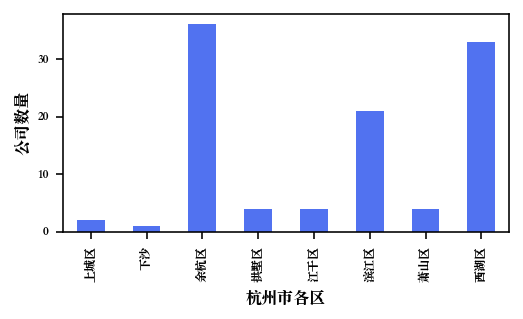

In [17]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.sans-serif'] = ['Songti SC']

df.groupby("district")['positionName'].count().plot(
    kind='bar', figsize=(4, 2), color='#5172F0', fontsize=6)

plt.ylabel("公司数量",fontsize = 8)
plt.xlabel("杭州市各区",fontsize = 8)

plt.show()